<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [ ]:
import pandas as pd
import numpy as np
import math
from src import soporte_preprocesamiento as sc

# Librerías para graficar
import seaborn as sns
import matplotlib.pyplot as plt

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("datos/autorenew.csv")

In [3]:
df.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371528.0,17295.141865,3.587954e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearOfRegistration,371528.0,2004.577997,9.286660e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,371528.0,113.967833,1.895166e+02,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,371528.0,125618.688228,4.011234e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,371528.0,5.734445,3.712412e+00,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,371528.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,371528.0,50820.667640,2.579908e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04


In [5]:
df.describe(include="O").T

,count,unique,top,freq
dateCrawled,371528,280500,2016-03-24 14:49:47,7
name,371528,233531,Ford_Fiesta,657
seller,371528,2,private,371525
offerType,371528,2,offer,371516
abtest,371528,2,test,192585
vehicleType,237765,7,small car,80023
gearbox,351319,2,manually,274214
model,351044,251,golf,30070
fuelType,338142,7,petrol,223857
brand,371528,40,volkswagen,79640


In [6]:
(df["price"] == 0).sum()

np.int64(10778)

In [7]:
df.isna().sum()

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType            133763
yearOfRegistration          0
gearbox                 20209
powerCV                     0
model                   20484
kilometer                   0
monthOfRegistration         0
fuelType                33386
brand                       0
notRepairedDamage       72060
dateCreated                 0
nrOfPictures                0
postalCode                  0
lastSeen                    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(4)

In [9]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

Reemplazos:

- Cambiamos fechas a DateTime, nos quedamos sólo con el mes y lo convertimos en objeto.
- Los precios y los meses que tienen valores de cero, los convertimos a nulos.
- Pictures la eliminamos porque son todo ceros.
- Vemos que, hay muchos coches con motores que no se corresponden con la realidad, muy por encima de 1000HP o por debajo de 50HP, los transformaremos a nulos. Misma situación con los precios, donde tenemos ceros y valores por encima de 1M de $.

In [10]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCrawled'] = df['dateCrawled'].dt.to_period('M').astype(object)

df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['dateCreated'] = df['dateCreated'].dt.to_period('M').astype(object)

df['lastSeen'] = pd.to_datetime(df['lastSeen'])
df['lastSeen'] = df['lastSeen'].dt.to_period('M').astype(object)

In [11]:
df['price'].replace(0, np.nan, inplace=True)
df['price'] = df['price'].astype(float)
df['monthOfRegistration'].replace(0, np.nan, inplace=True)
df.drop(columns="nrOfPictures", inplace=True)
df['postalCode'] = df['postalCode'].astype(object)
df['yearOfRegistration'] = df['yearOfRegistration'].astype(object)
df['monthOfRegistration'] = df['monthOfRegistration'].astype(object)
df.loc[(df["powerCV"] < 40) | (df["powerCV"] > 1000), "powerCV"] = np.nan
df.loc[df["price"] > 1000000, "price"] = np.nan
df.loc[df["yearOfRegistration"] < 1886, "yearOfRegistration"] = np.nan

In [12]:
(df["price"] > 1000000).sum()

np.int64(0)

In [13]:
df.dtypes

dateCrawled             object
name                    object
seller                  object
offerType               object
price                  float64
abtest                  object
vehicleType             object
yearOfRegistration      object
gearbox                 object
powerCV                float64
model                   object
kilometer                int64
monthOfRegistration     object
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
postalCode              object
lastSeen                object
dtype: object

In [14]:
df_num = df.select_dtypes(include = np.number)
cols_numericas = df_num.columns
cols_numericas

Index(['price', 'powerCV', 'kilometer'], dtype='object')

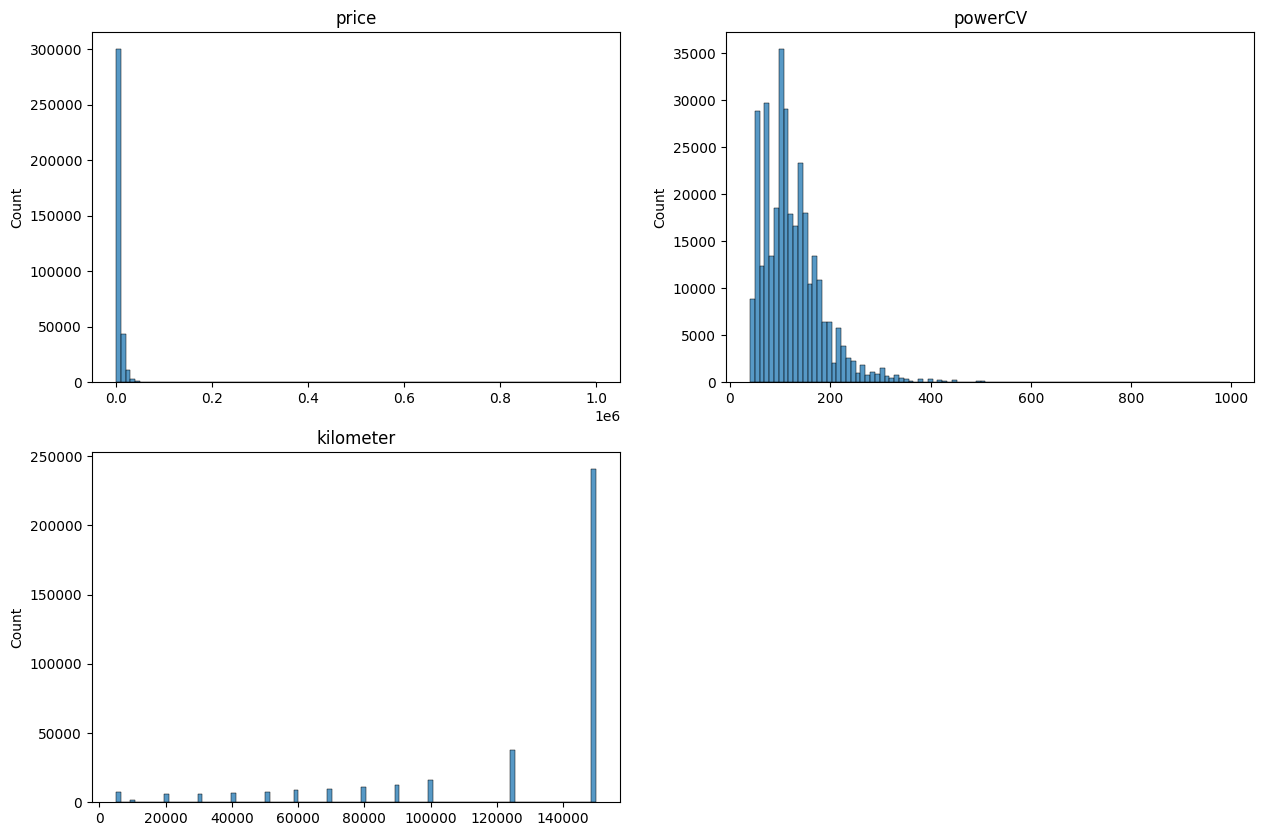

In [15]:
cols_numericas = df_num.columns
num_filas = math.ceil(len(cols_numericas) / 2)
fig, axes = plt.subplots(nrows=num_filas, ncols=2, figsize= (15,10))
axes = axes.flat

for indice, columna in enumerate(cols_numericas):
    sns.histplot(x = columna, data= df_num, ax = axes[indice], bins=100)
    axes[indice].set_title(columna)
    axes[indice].set_xlabel("")

if len(cols_numericas) % 2 != 0:
    fig.delaxes(axes[-1])
else:
    pass

In [16]:
df_categorias = df[['offerType', 'seller', 'abtest',
       'vehicleType', 'gearbox',
       'monthOfRegistration', 'fuelType',
       'notRepairedDamage']]

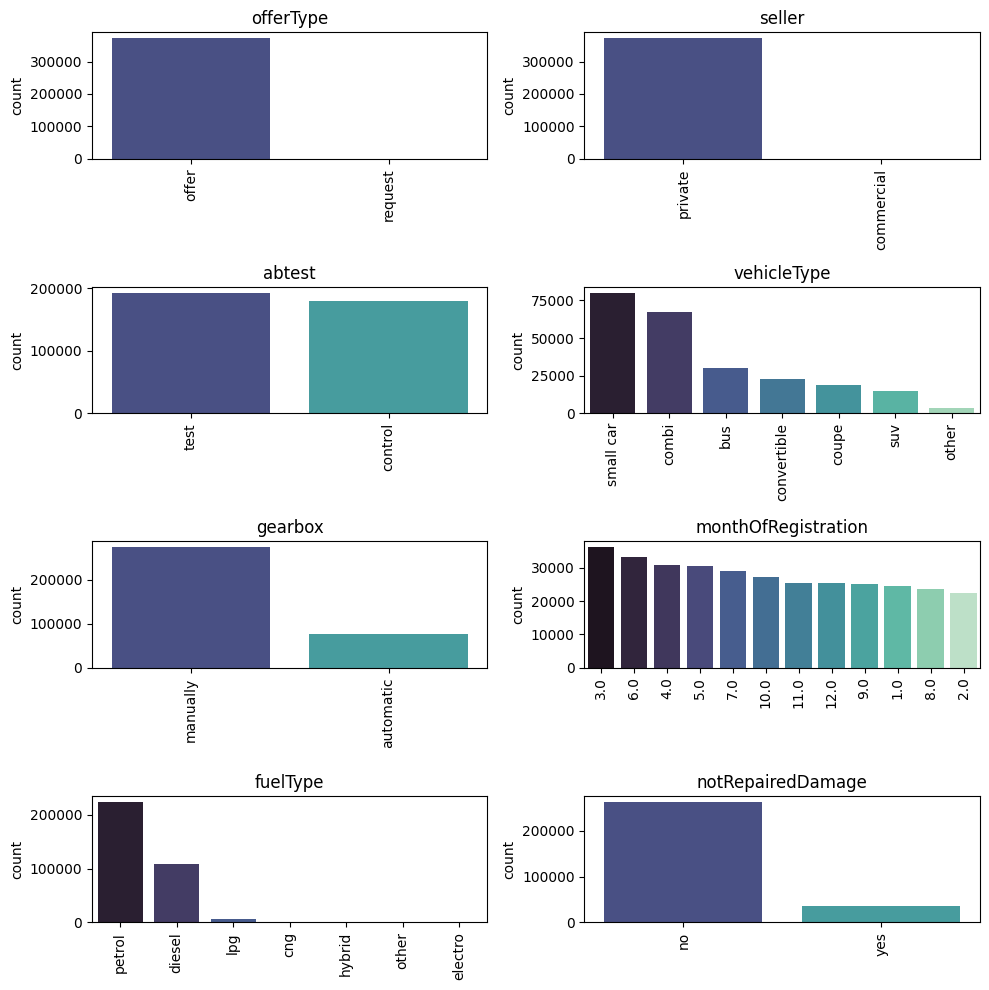

In [17]:
cols_categoricas = df_categorias.columns
num_filas = math.ceil(len(cols_categoricas) / 2)
fig, axes = plt.subplots(nrows=num_filas, ncols=2, figsize= (10,10))
axes = axes.flat

for indice, columna in enumerate(cols_categoricas):
    sns.countplot(x = columna,
                    data= df_categorias,
                    ax = axes[indice],
                    palette="mako",
                    order = df_categorias[columna].value_counts().index)
    
    axes[indice].set_title(columna)
    axes[indice].set_xlabel("")
    axes[indice].tick_params(axis = "x", rotation = 90)

if len(cols_categoricas) % 2 != 0:
    fig.delaxes(axes[-1])
else:
    pass

plt.tight_layout()

In [18]:
df_relacion_cat = df[['offerType', 'seller', 'abtest',
       'vehicleType', 'gearbox',
       'monthOfRegistration', 'fuelType',
       'notRepairedDamage', 'price']]

,offerType,price
1,request,7375.666667
0,offer,5999.208670


,seller,price
1,private,5999.259009
0,commercial,2700.000000


,abtest,price
1,test,6027.046547
0,control,5969.335721


,vehicleType,price
6,suv,13430.022687
3,coupe,12342.624689
2,convertible,10860.030852
0,bus,6757.588638
1,combi,5892.384534
4,other,4821.876269
5,small car,2795.688989


,gearbox,price
0,automatic,10717.386443
1,manually,4789.492424


,monthOfRegistration,price
6,7.0,6757.801774
0,1.0,6593.561148
3,4.0,6449.875997
10,11.0,6366.493256
2,3.0,6359.123463
8,9.0,6320.418848
1,2.0,6298.430713
5,6.0,6266.642534
9,10.0,6181.049989
7,8.0,6147.553369


,fuelType,price
2,electro,18673.333333
3,hybrid,14890.691176
1,diesel,8601.963874
6,petrol,5086.008083
0,cng,4760.855357
4,lpg,4432.803937
5,other,3885.283237


,notRepairedDamage,price
0,no,7154.879420
1,yes,2311.245295


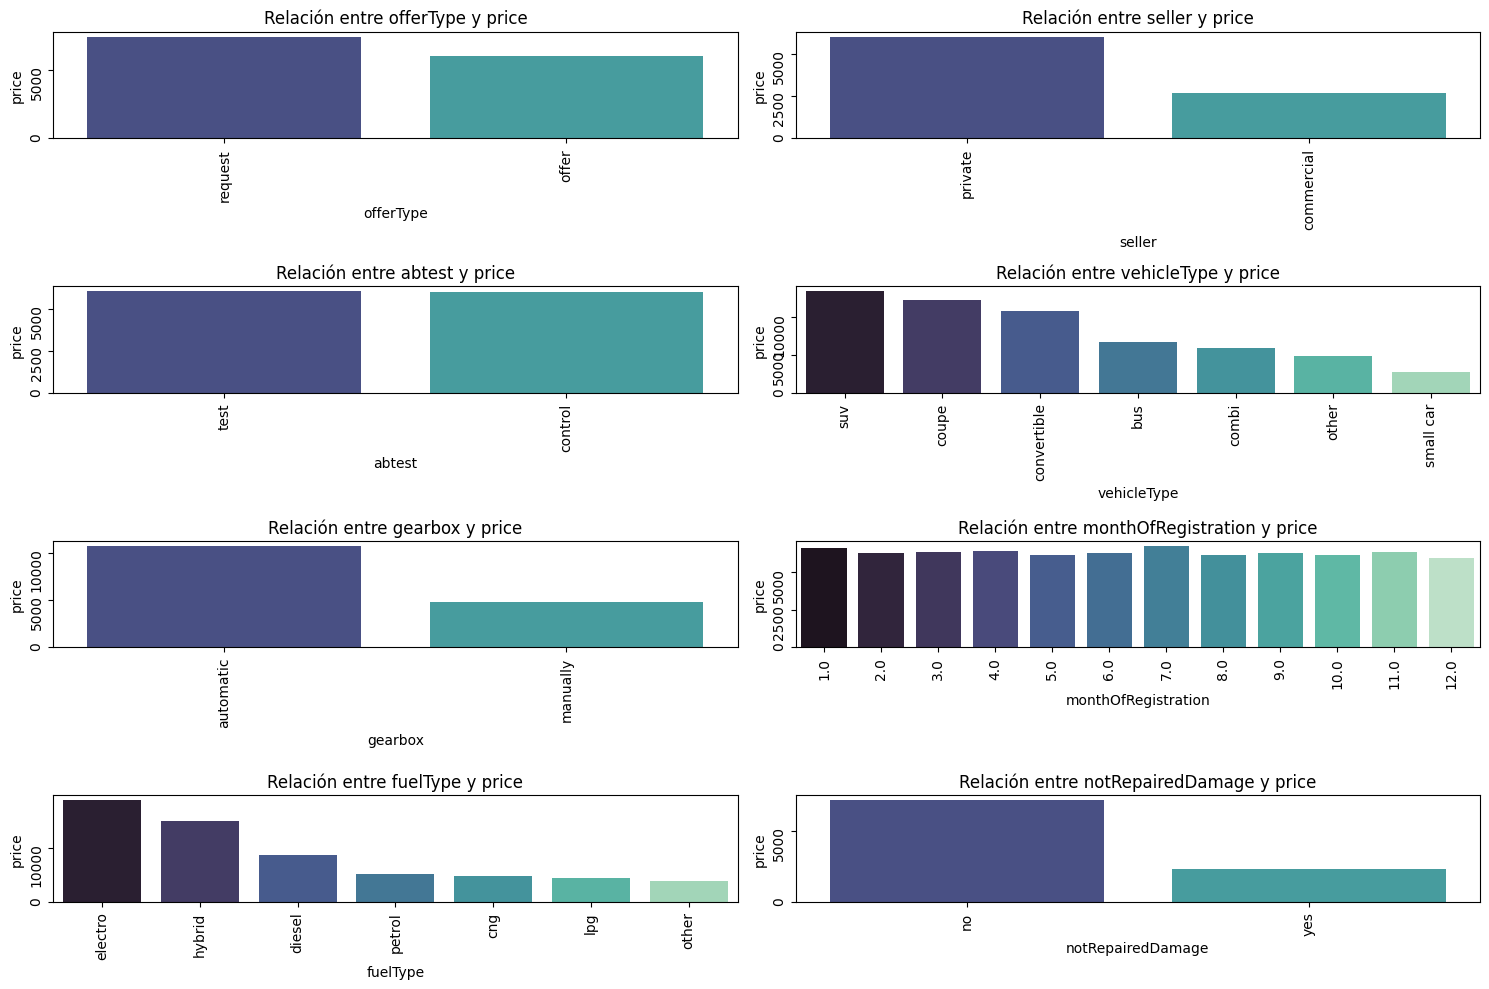

In [19]:
sc.relacion_vs_cat(df_relacion_cat, "price")

1.	Relación entre offerType y price: Los precios se distribuyen entre “request” y “offer”. Los precios para “request” son ligeramente más bajos en promedio que los de “offer”.
2.	Relación entre seller y price: Los vendedores “private” tienen precios en promedio más bajos en comparación con los vendedores “commercial”, lo cual sugiere una diferencia de precio según el tipo de vendedor.
3.	Relación entre abtest y price: Las categorías de “test” y “control” en el abtest muestran una distribución similar en el precio, con “control” mostrando una ligera tendencia a precios más altos.
4.	Relación entre vehicleType y price: Los tipos de vehículo como “suv” y “coupe” presentan los precios más altos en comparación con otros tipos de vehículo como “small car” o “combi”, que tienen precios más bajos.
5.	Relación entre gearbox y price: Los vehículos con caja de cambios “automatic” presentan precios en promedio más bajos que aquellos con caja de cambios manual.
6.	Relación entre monthOfRegistration y price: No se observa una variación notable en los precios entre los diferentes meses de registro, lo que sugiere que el mes de registro no influye significativamente en el precio.
7.	Relación entre fuelType y price: Los vehículos de tipo de combustible “electro” y “hybrid” muestran precios más altos en comparación con otros tipos de combustible como “diesel”, “petrol” o “cng”, lo que tiene sentido.
8.	Relación entre notRepairedDamage y price: Los vehículos que no tienen daños reparados (“no”) presentan precios significativamente más altos en comparación con aquellos que sí tienen daños reparados (“yes”), nuevamente, tiene sentido.

En general, se observan algunas tendencias de precios según el tipo de oferta, vendedor, tipo de vehículo y estado de reparación.

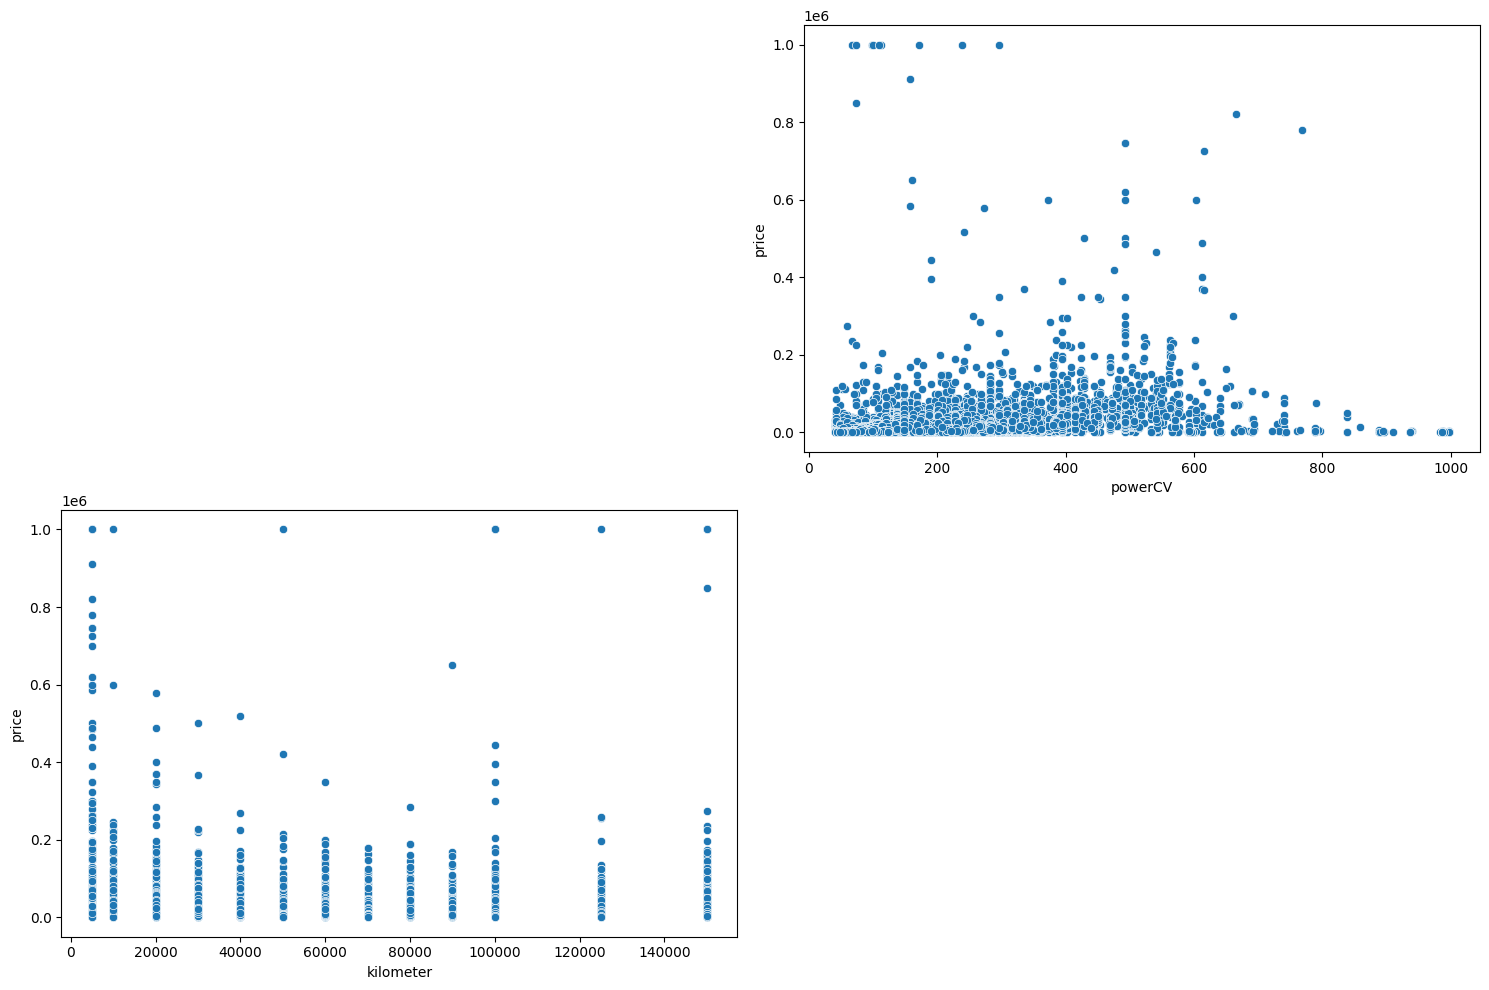

In [20]:
sc.relacion_vs_numericas(df, "price")

- PowerCV vs. price
	- La relación entre la potencia del vehículo (powerCV) y el precio muestra una gran dispersión.
	- Aunque la mayoría de los vehículos se encuentran en el rango de 0 a 400 CV y tienen precios relativamente bajos, hay algunos puntos dispersos que alcanzan valores de precio altos incluso para bajas potencias, sugieriendo que podrían ser datos equivocados.
	- No se observa una relación clara o lineal entre la potencia y el precio, aunque se pueden notar algunos precios elevados en vehículos de potencia media y alta.

- Gráfico de kilometer vs. price:
	- La relación entre el kilometraje (kilometer) y el precio también muestra una gran dispersión, con algunos vehículos a precios altos independientemente de su kilometraje.
	- A medida que aumenta el kilometraje, la mayoría de los precios tienden a concentrarse en valores bajos, lo cual es consistente con la depreciación de los vehículos con un mayor recorrido.
	- Existen algunos valores atípicos donde vehículos con kilometraje alto tienen precios inusualmente altos, lo que puede indicar condiciones especiales o errores en los datos.

En general, ambos gráficos sugieren que hay factores adicionales que afectan el precio, más allá de la potencia y el kilometraje, ya que las relaciones no son totalmente lineales ni claras. También es notable la presencia de varios valores atípicos en ambas relaciones.

## Correlación

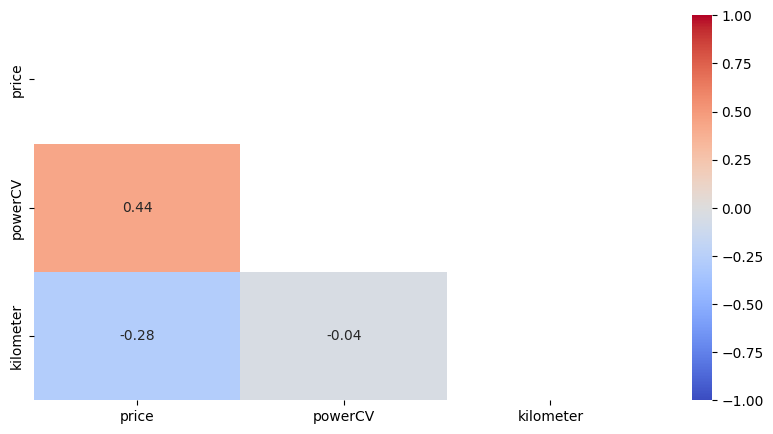

In [22]:
sc.matriz_correlacion(df)

1.	Relación entre price y powerCV:
- Existe una correlación positiva moderada de 0.44 entre price y powerCV. Esto indica que, en general, a medida que aumenta la potencia del vehículo, el precio también tiende a aumentar, aunque no de forma muy fuerte.
2.	Relación entre price y kilometer:
- Hay una correlación negativa de -0.28 entre el precio y el kilometraje (kilometer). Esto sugiere que, en promedio, a mayor kilometraje, el precio tiende a disminuir, lo cual es consistente con la depreciación de los vehículos a medida que se usan más.
3.	Relación entre powerCV y kilometer:
- La correlación entre powerCV y kilometraje es muy baja, con un valor de -0.04, lo que indica que prácticamente no existe una relación significativa entre estas dos variables.

En resumen, el precio parece estar influenciado de manera moderada por la potencia (positivamente) y el kilometraje (negativamente), mientras que la potencia y el kilometraje no están relacionados entre sí.

## Outliers

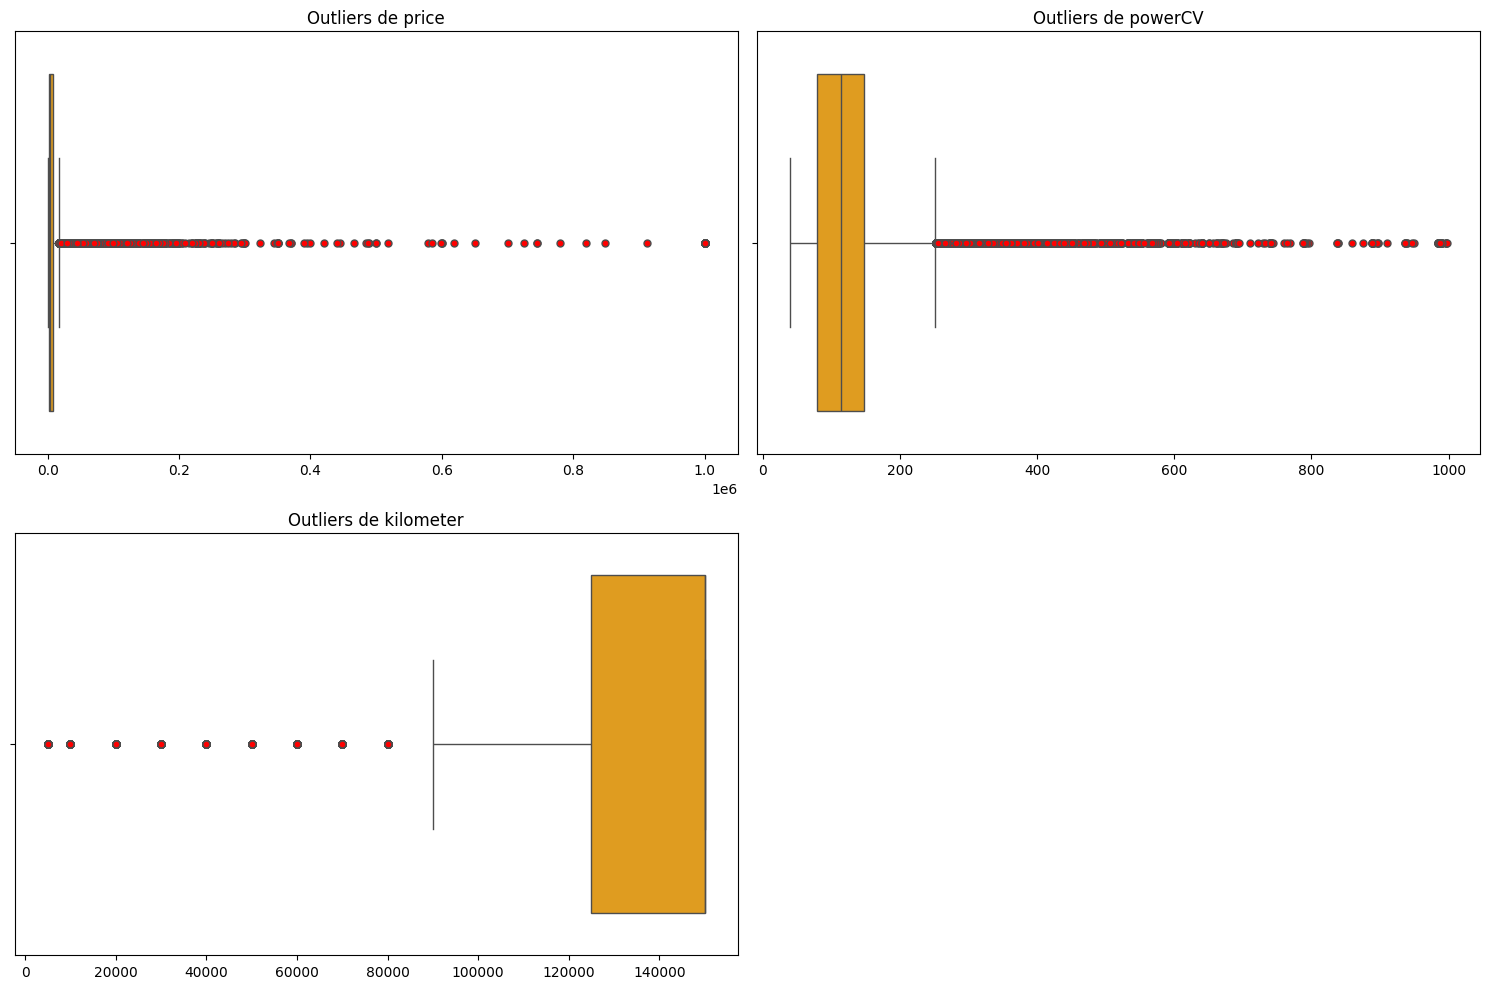

In [23]:
sc.detectar_outliers(df)

1.	Outliers de price:
	- El boxplot de price muestra una gran cantidad de valores atípicos en el extremo superior.
	- La mayor parte de los datos están concentrados cerca del límite inferior, lo que indica que la mayoría de los precios son bajos, mientras que algunos vehículos tienen precios extremadamente altos, alejados de la media.
	- Estos valores atípicos sugieren la presencia de vehículos de lujo o condiciones especiales en el conjunto de datos, o podrían ser datos erróneos.
2.	Outliers de powerCV:
	- En el caso de powerCV, también se observan muchos valores atípicos en el extremo superior.
	- La mayoría de los vehículos tienen una potencia baja, pero hay un número significativo de vehículos con potencias superiores a 200 CV, extendiéndose hasta 1000 CV, lo cual es bastante alto.
	- Esto podría indicar la presencia de vehículos de alto rendimiento o deportivos en el conjunto de datos, o también posibles errores en la entrada de datos.
3.	Outliers de kilometer:
	- El boxplot de kilometer muestra un comportamiento diferente. La mayoría de los datos están concentrados en el extremo superior, en torno a los 150,000 km.
	- Los valores atípicos están en el lado inferior del boxplot, indicando que hay pocos vehículos con bajo kilometraje en comparación con el resto.
	- Esto sugiere que la mayoría de los vehículos en el conjunto de datos tienen un kilometraje alto, probablemente debido a la venta de vehículos usados, y los valores bajos de kilometraje pueden corresponder a vehículos nuevos o muy bien conservados.

- En general, los tres boxplots indican la presencia de valores extremos, especialmente en price y powerCV, lo cual podría afectar los análisis y modelos.

## Gestión de nulos 

In [25]:
df_num = df.select_dtypes(include = np.number)
imputer_knn = KNNImputer(n_neighbors=2)
knn_imputado = imputer_knn.fit_transform(df.select_dtypes(include = np.number)) #columnas que quiero que use para rellenar los vecinos
knn_imputado

array([[4.800e+02, 1.065e+02, 1.500e+05],
       [1.830e+04, 1.870e+02, 1.250e+05],
       [9.800e+03, 1.610e+02, 1.250e+05],
       ...,
       [9.200e+03, 1.010e+02, 1.500e+05],
       [3.400e+03, 9.900e+01, 1.500e+05],
       [2.899e+04, 3.160e+02, 5.000e+04]])

In [26]:
df_num_sin_nulos= pd.DataFrame(knn_imputado, columns=df_num.columns)
df_knn = df.copy()
df_knn[df_num.columns] = df_num_sin_nulos
df_knn.isnull().sum()

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType            133763
yearOfRegistration         68
gearbox                 20209
powerCV                     0
model                   20484
kilometer                   0
monthOfRegistration     37675
fuelType                33386
brand                       0
notRepairedDamage       72060
dateCreated                 0
postalCode                  0
lastSeen                    0
dtype: int64

In [34]:
df_knn.to_csv("datos/knn.csv")

In [30]:
imputer_iterative = IterativeImputer(estimator=RandomForestRegressor()) #con missing_values podría decirle de qué tiempo son los valores nulos (ej string)
iterative_imputado = imputer_iterative.fit_transform(df_num)
df_num_sin_nulos_iterative = pd.DataFrame(iterative_imputado, columns = df_num.columns)
df_iterative = df.copy()
df_iterative[df_num.columns] = df_num_sin_nulos_iterative
df_iterative.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03,Golf_3_1.6,private,offer,480.0,test,NaN,1993,manually,85.368409,golf,150000.0,NaN,petrol,volkswagen,NaN,2016-03,70435,2016-04
1,2016-03,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011,manually,187.000000,NaN,125000.0,5.0,diesel,audi,yes,2016-03,66954,2016-04
2,2016-03,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004,automatic,161.000000,grand,125000.0,8.0,diesel,jeep,NaN,2016-03,90480,2016-04
3,2016-03,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001,manually,74.000000,golf,150000.0,6.0,petrol,volkswagen,no,2016-03,91074,2016-03
4,2016-03,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008,manually,68.000000,fabia,90000.0,7.0,diesel,skoda,no,2016-03,60437,2016-04


In [33]:
df_iterative.to_csv("datos/iterative.csv")

In [31]:
df_iterative.describe()

,price,powerCV,kilometer
count,371524.000000,371524.000000,371524.000000
mean,5930.496953,122.629307,125618.842928
std,12579.985046,59.921103,40112.138811
min,1.000000,40.000000,5000.000000
25%,1250.000000,81.000000,125000.000000
50%,3000.000000,109.000000,150000.000000
75%,7299.000000,148.000000,150000.000000
max,1000000.000000,998.000000,150000.000000


In [32]:
df.describe()

,price,powerCV,kilometer
count,360681.000000,328631.000000,371524.000000
mean,5999.231568,124.842726,125618.842928
std,12634.998842,62.176856,40112.138811
min,1.000000,40.000000,5000.000000
25%,1250.000000,79.000000,125000.000000
50%,3000.000000,114.000000,150000.000000
75%,7490.000000,148.000000,150000.000000
max,1000000.000000,998.000000,150000.000000


In [35]:
df_knn.describe()

,price,powerCV,kilometer
count,371524.000000,371524.000000,371524.000000
mean,5887.789532,122.505593,125618.842928
std,12481.700752,59.864638,40112.138811
min,1.000000,40.000000,5000.000000
25%,1200.000000,81.000000,125000.000000
50%,2999.000000,108.000000,150000.000000
75%,7299.000000,148.000000,150000.000000
max,1000000.000000,998.000000,150000.000000


### Comparación de resultados
- Para comprobar qué metodo de impugnación ha producido mejores resultados, hacemos un print de los tres describes, comprobando que, el método que ha dado mejores resultados acercándose a los valores del dataframe original, es el Iterative Imputer, haciendo uso del Random Forest Regressor, por lo que, seguiremos trabajando sobre este DF.

In [36]:
df_iterative.isna().sum()

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType            133763
yearOfRegistration         68
gearbox                 20209
powerCV                     0
model                   20484
kilometer                   0
monthOfRegistration     37675
fuelType                33386
brand                       0
notRepairedDamage       72060
dateCreated                 0
postalCode                  0
lastSeen                    0
dtype: int64

In [39]:
df_iterative["vehicleType"].unique()

array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)

In [38]:
df_iterative["notRepairedDamage"].unique()

array([nan, 'yes', 'no'], dtype=object)

In [41]:
df_iterative["monthOfRegistration"].mode()

0    3.0
Name: monthOfRegistration, dtype: object

In [42]:
df_iterative["yearOfRegistration"].mode()

0    2000
Name: yearOfRegistration, dtype: object

## Impugnación de categóricas

- Realizaremos las siguientes operaciones:
1. vehicleType: sustituiremos la categoría por no disponible (NA)
2. yearOfRegistration: sustituiremos el año por la moda
3. gearbox: sustituiremos la categoría por no disponible (NA)
4. model: sustituiremos la categoría por no disponible (NA)
5. monthOfRegistration: sustituiremos el mes por la moda
6. fuelType: sustituiremos la categoría por no disponible (NA)
7. notRepairedDamage: sustituiremos la categoría por no disponible (NA)

In [47]:
df_iterative['vehicleType'] = df_iterative['vehicleType'].fillna('NA')
df_iterative['yearOfRegistration'] = df_iterative['yearOfRegistration'].fillna('2000')
df_iterative['gearbox'] = df_iterative['gearbox'].fillna('NA')
df_iterative['model'] = df_iterative['model'].fillna('NA')
df_iterative['monthOfRegistration'] = df_iterative['monthOfRegistration'].fillna('3.0')
df_iterative['fuelType'] = df_iterative['fuelType'].fillna('NA')
df_iterative['notRepairedDamage'] = df_iterative['notRepairedDamage'].fillna('NA')

In [48]:
df_iterative.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerCV                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64